### Discrete Distributions

Bernoulli distribution          
> takes value 1 when an experiment succeeds and 0 otherwise; eg coin tossing with uneven coin

    from scipy.stats import bernoulli


Binomial distribution	        
> number of successes in n trials (models the sum of independent Bernoulli random variables); eg counting errors/successes

    from scipy.stats import binom
    

Geometric distribution	        
> number of failures before the first success; eg trying until success

    from scipy.stats import geom     
    
    
Negative binomial distribution	
> The negative binomial tells you the number of trials until a specified number of successes in a binomial
distribution.

    from scipy.stats import nbinom           


Hypergeometric distributions
> A variant on the geometric distribution
model, hypergeometric distributions give the probability that some
number from a sample will be of a particular value — the probability
of drawing a female from a set of males and females, for example. In
hypergeometric distributions, there are no replacements when samples
are taken from a finite population. As samples are drawn, the size of the
remaining population decreases and the probability of drawing a male or
a female sample changes based on the net decrease in the population size.

    from scipy.stats import hypergeom


Poisson distribution            
> distribution of the total number of occurrences of an event within a given unit of time (models the number of unpredictable events within a unit of time)   
$$ 
P(X) = \frac{\lambda^k}{k!}e^{-\lambda}
$$
where: $ \lambda $ - the mean rate of occurrence of some even,  k - the number of actually observed occurrences for which we calculate the probability; eg countable, rare events whose occurrence is independent

    from scipy.stats import poisson


Gamma
> The gamma distribution tells you how many samples you go through to find a specified number of successes in a Poisson distribution.
    

### Continuous Distributions


Uniform
> eg rolling a dice
    np.random.uniform
    
    from scipy.stats import uniform

Gaussian
> eg random “noise”, sums of many variables

    from scipy.stats import norm
    
Lognormal distribution          
> distribution whose logarithm has a normal distribution (the income of a family follows a lognormal distribution)
    
    from scipy.stats import lognorm
    

T
> the ratio between the sample mean and the standard error has the T distribution

    from scipy.stats import t
    
    
F
> If we want to investigate whether two groups have the same variance, we have to
calculate the ratio of the sample standard deviations squared: 
$$
F = \frac{s^2_x}{s^2_y}
$$

    from scipy.stats import f


Exponential distribution        
> distribution of the time we need to wait before an event occurs if the probability that the event occurs during a certain time interval  is proportional to the length of that time interval. (models the waiting time between two events in a Poisson process;  the Poisson (discrete) and exponential (continuous) distributions complement one another.)

    from scipy.stats import expon
    
    
Weibull Distribution
> The Weibull distribution is the most commonly used distribution for modeling
reliability data or “survival” data. If the quantity x is a “time-to-failure,” the Weibull distribution gives a distribution for which the failure rate is proportional to a power of time. 
- A value of k < 1 indicates that the failure rate decreases over time. This happens
if there is significant “infant mortality,” or defective items failing early and the
failure rate decreasing over time as the defective items are weeded out of the
population.
- A value of k D 1 indicates that the failure rate is constant over time. This might
suggest random external events are causing mortality, or failure.
- A value of k > 1 indicates that the failure rate increases with time. This happens
if there is an “aging” process, or parts that are more likely to fail as time goes on.
An example would be products with a built-in weakness that fail soon after the
warranty expires.

    from scipy.stats import weibull_min, weibull_max
    

Cauchy distribution             
> distribution describing resonance behavior

    from scipy.stats import cauchy
    

Beta
> Beta distribution represents a probability distribution of probabilities, ie it represents all probability values with a probability distribution. Eg for a binomia distribution $B(\alpha,\beta)$, where: $\alpha$ - number of successes, $\beta$ - number of failures

    from scipy.stats import beta


Gamma
> ...

    from scipy.stats import gamma
    
    

### Functions

**Probit** -  inverse of the cumulative distribution function of the standard normal distribution

**Logit** - gives the log-odds or the logarithm of the odds p/(1 − p) 

$$
logit(p) = log(\frac{p}{1-p}) = \beta_0 + \beta_1 * x
$$
_The log odds is expressed as a linear function of score. Solve for p as a function of x to get:_
$$
P(x) = \frac{1}{1 + e^{-(\beta_0 + \beta_1*x)}}
$$

In [1]:
from scipy.stats import norm

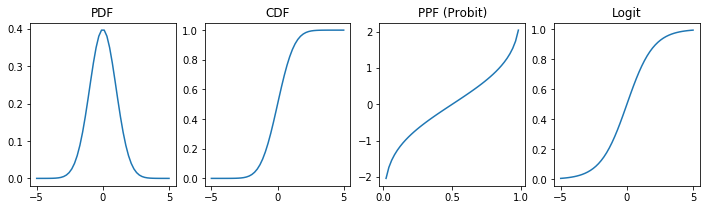

In [2]:
plt.figure(figsize=(12,3))

plt.subplot(141)
x = np.linspace(-5,5)
plt.plot(x, norm.pdf(x))
plt.title("PDF")

plt.subplot(142)
x = np.linspace(-5,5)
plt.plot(x, norm.cdf(x))
plt.title("CDF")

plt.subplot(143)
x = np.linspace(0,1)
plt.plot(x, norm.ppf(x))  # percent point function, inverse of cdf, ie probit
plt.title("PPF (Probit)")

plt.subplot(144)
x = np.linspace(-5,5)
logit = lambda x: 1/(1 + np.exp(-x))
plt.plot(x, logit(x))
plt.title("Logit");

### Scipy Methods

    rvs: Random Variates
    pdf: Probability Density Function (for continuous distributions)
    pmf: Probability Mass Function (for discrete distributions)
    cdf: Cumulative Distribution Function
    sf: Survival Function (1-CDF)
    ppf: Percent Point Function (Inverse of CDF)
    isf: Inverse Survival Function (Inverse of SF)
    stats: Return mean, variance, (Fisher’s) skew, or (Fisher’s) kurtosis
    moment: non-central moments of the distribution
    

The estimation of distribution parameters:

    fit: maximum likelihood estimation of distribution parameters, including location and scale
    fit_loc_scale: estimation of location and scale when shape parameters are given
    nnlf: negative log likelihood function
    expect: Calculate the expectation of a function against the pdf or pmf


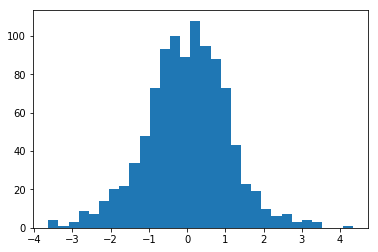

In [3]:
import scipy as sp
trvs = sp.stats.t.rvs(df=10, loc=0, scale=1, size=1000)
plt.hist(trvs,bins=30);

In [4]:
n, (smin, smax), smean, svariance, skew, skurtosis = sp.stats.describe(trvs)
f"n:{n}, (min,max): {smin, smax}, mean: {smean}, var: {svariance}, skew: {skew}, kurt: {skurtosis}"

'n:1000, (min,max): (-3.6309260032279234, 4.328863785283673), mean: -0.00235565812663743, var: 1.183334517310308, skew: -0.05475699820854659, kurt: 0.7186479666174321'

In [5]:
tmean, tvariance, tskew, tkurtosis = sp.stats.t.stats(10, moments='mvsk')
tmean, tvariance, tskew, tkurtosis

(array(0.), array(1.25), array(0.), array(1.))

In [6]:
# use the t-test to test it the sample mean differs statistcally significantly from the theoretical expectation
# p-value is the prob. that the sample mean is 0
print( 't-statistic = %6.3f, pvalue = %6.4f' %  sp.stats.ttest_1samp(trvs, tmean) )

t-statistic = -0.068, pvalue = 0.9454


In [7]:
# the Kolmogorov-Smirnov test can test the hypothesis that the sample comes from the standard t-distribution
# if the p-value is high then we cannot reject the null hypothesis that 
# the sample is distributed here according to the t-distribution.
print( 'KS-statistic D = %6.3f, pvalue = %6.4f' % sp.stats.kstest(trvs, 't', (10,)) )

KS-statistic D =  0.027, pvalue = 0.4476


In [8]:
# if the Kolmogorov-Smirnov test against the standard normal distribution gives high p-value,
# then we cannot reject the null hypothesis that our sample was generated by the normal distribution
print( 'KS-statistic D = %6.3f, pvalue = %6.4f' % sp.stats.kstest(trvs,'norm') )

KS-statistic D =  0.021, pvalue = 0.7886


In [9]:
# The chisquare test can be used eg to test if for a finite number of bins, 
# the observed frequencies differ significantly from the hypothesized distribution probabilites.

In [10]:
quantiles = [0.0, 0.01, 0.05, 0.1, 1-.1, 1-0.05, 1-0.01, 1.0]
t_ppf = sp.stats.t.ppf(quantiles, 10)
t_ppf

array([       -inf, -2.76376946, -1.81246112, -1.37218364,  1.37218364,
        1.81246112,  2.76376946,         inf])

In [11]:
n_sample = trvs.size
freqcount = np.histogram(trvs, bins=t_ppf)[0]
tprob = np.diff(quantiles)
nprob = np.diff(sp.stats.norm.cdf(t_ppf))
tprob, nprob

(array([0.01, 0.04, 0.05, 0.8 , 0.05, 0.04, 0.01]),
 array([0.00285689, 0.03210059, 0.05004565, 0.82999372, 0.05004565,
        0.03210059, 0.00285689]))

In [12]:
nch, npval = sp.stats.chisquare(freqcount, nprob*n_sample)
tch, tpval = sp.stats.chisquare(freqcount, tprob*n_sample)

# the standard normal distribution is clearly rejected
print( 'chisquare for normal: chi2 = %6.3f, pvalue = %6.4f' % (nch, npval) )
# the standard t-distribution cannot be rejected
print( 'chisquare for t:      chi2 = %6.3f, pvalue = %6.4f' % (tch, tpval) )

chisquare for normal: chi2 = 56.813, pvalue = 0.0000
chisquare for t:      chi2 =  9.880, pvalue = 0.1298


In [13]:
# the fit method of the distributions can be used to estimate the parameters of the distribution
nloc, nscale = sp.stats.norm.fit(trvs)
nprob = np.diff(sp.stats.norm.cdf(t_ppf, loc=nloc, scale=nscale))
tdof, tloc, tscale = sp.stats.t.fit(trvs)
tprob = np.diff(sp.stats.t.cdf(t_ppf, tdof, loc=tloc, scale=tscale))

# the tests are repeated using probabilites of the estimated distribution,
# here, we cannot reject the null hypotheses that the sample came from normal or t distribution
nch, npval = sp.stats.chisquare(freqcount, nprob*n_sample)
tch, tpval = sp.stats.chisquare(freqcount, tprob*n_sample)
print ('chisquare for normal: chi2 = %6.3f, pvalue = %6.4f' % (nch, npval))
print ('chisquare for t:      chi2 = %6.3f, pvalue = %6.4f' % (tch, tpval))

chisquare for normal: chi2 = 27.272, pvalue = 0.0001
chisquare for t:      chi2 =  8.235, pvalue = 0.2214


In [14]:
# test if skew and kurtosis of the sample differ significantly from those of a normal distribution
# if p-values are low, we can reject the hypothesis that our sample has the skew and kurtosis of normal distribution.
print ('normal skewtest teststat = %6.3f, pvalue = %6.4f' % sp.stats.skewtest(trvs))
print ('normal kurtosistest teststat = %6.3f, pvalue = %6.4f' % sp.stats.kurtosistest(trvs))
print ('normaltest teststat = %6.3f, pvalue = %6.4f' % sp.stats.normaltest(trvs))

normal skewtest teststat = -0.712, pvalue = 0.4767
normal kurtosistest teststat =  3.626, pvalue = 0.0003
normaltest teststat = 13.653, pvalue = 0.0011


In [15]:
print ('normaltest of t-dist: teststat = %6.3f, pvalue = %6.4f' % sp.stats.normaltest(sp.stats.t.rvs(10, size=100)))
print ('normaltest of norm-dist: teststat = %6.3f, pvalue = %6.4f' % sp.stats.normaltest(sp.stats.norm.rvs(size=1000)))

normaltest of t-dist: teststat =  6.672, pvalue = 0.0356
normaltest of norm-dist: teststat =  3.619, pvalue = 0.1637


### The Standard Error of the Mean (SEM)

The SEM enables you to establish a range around a sample mean that the majority of any future experiments will most likely fall within. 1-SEM will usually envelops 68% of the future means and 2-SEMs envelop 95% of the future means. 2-SEMs are called the “estimated 95% confidence interval”.

Sometimes when you cannot perform at least 20-30 experiments, bootstrapping the confidence intervals is a more accurate method of determining the 95% confidence interval around your experimental mean. Oftetimes, bootstrapped 95% confidence intervals provide more accurate confidence intervals than 95% confidence intervals estimated from the SEM.

### One-sample, One-measure

### Two-samples, One-measure

### Hypothesis Testing

A hypothesis test uses a sample to test hypotheses about the population from which the sample is drawn. This helps
you make decisions or draw conclusions about the population. A hypothesis test has the following components:

Null hypothesis (denoted H0 ) is a hypothesis about the population from which a sample or samples are drawn.
It is usually a hypothesis about the value of an unknown parameter such as the population mean or variance,
e.g. H0 : The population mean is equal to five. The null hypothesis is adopted unless proven false.

Alternative hypothesis (denoted H1 or HA ) is the hypothesis that will be accepted if there is enough evidence to reject the null hypothesis.

Test statistic is a statistic calculated from the sample values, which has a known distribution under the null
hypothesis. It varies depending on the type of test and has no direct interpretation.

p-value gives the probability of observing the test statistic or something more extreme, assuming that the null
hypothesis is true. If this is very small, then it suggests that the null hypothesis is not feasible, giving evidence in support of the alternative hypothesis.

Significance level (denoted a) is the cut-off point at which the null hypothesis is rejected. The significance
level should be determined before beginning the test. Usually a significance level of 0.05 is used, but 0.01 and
0.1 are also popular choices. If a significance level of 0.05 is used, then we reject the null hypothesis in favor of
the alternative hypothesis only if the p-value is less than 0.05. Otherwise, no conclusion is drawn. Choosing a
significance level of 0.05 means that if the null hypothesis were true, there would be a 5% chance of incorrectly
rejecting it (i.e., making a type I error).


- ttest_1samp
> Compare one sample with a constant value (one sample t-test)

- ttest_ind(a, b[, axis, equal_var]) 
> Calculates the T-test for the means of TWO INDEPENDENT samples of scores.
>compare the means of two samples (two sample t-test and paired t-test)

- ttest_rel(a, b[, axis])
>Calculates the T-test on TWO RELATED samples of scores, a and b.
>compare the means of two samples (two sample t-test and paired t-test)

- ranksums
>Wilcoxon rank-sum tests (the non-parametric alternative to the t-test; one-sample, two-sample, paired)

- shapiro
> Perform the Shapiro-Wilk test for normality; determine whether a sample has been drawn from a normal
distribution. The null hypothesis for the test is that the sample is drawn from a normal distribution and the alternative hypothesis is that it is not

- kstest, ks_2samp
 > Kolmogorov-Smirnov tests for fit to a distribution

 > A one-sample Kolmogorov-Smirnov test helps to determine whether a sample is drawn from a particular theoretical
distribution. It has the null hypothesis that the sample is drawn from the distribution and the alternative hypothesis that it is not. 

 > A two-sample Kolmogorov-Smirnov test helps to determine whether two samples are drawn from the same
distribution. It has the null hypothesis that they are drawn from the same distribution and the alternative hypothesis that they are not.

- mannwhitneyu
>The MWW RankSum test is a useful test to determine if two distributions are significantly different or not. 

- chisquare
 > The chi square test tests the null hypothesis that the categorical data has the given frequencies; tests if the observed frequencies differ significantly from the probabilites of the hypothesized/expected distribution

- chi2_contingency, contingency.expected_freq
 > Chi-square test of independence of variables in a contingency table; A test of proportions allows you to compare the proportion of observations with a given outcome or attribute (referred to as a success) across two or more groups of observations to determine whether they are significantly different. The null hypothesis for the test is that the probability of a success is the same for all of the groups, and the alternative hypothesis is that the probability of success is not the same for all of the groups.

 > contingency.expected_freq(observed) 	Compute the expected frequencies from a contingency table.

 > nonparametric test for relatioinship when working with cross-tables; aplicable to both categoricals and numerics (after it has been discretized into bins); tells when the table dist of two variables is statistically comparable to a table in which the two variables are hypothesized as not related to each other (the so called independence hypothesis); the p-value is the chance that the chhi-square difference is just by chance

- fisher_exact
>Performs a Fisher exact test on a 2x2 contingency table. test for association between two categorical variables that each have two levels. The test has the null
hypothesis that the two variables are independent and the alternative hypothesis that they are not independent.

- f_oneway
>analysis of variance to compare the means of three or more samples

- kruskal
>Compute the Kruskal-Wallis H-test for independent samples; Kruskal-Wallis test (the nonparametric alternative to the analysis of variance, which can be used when the distribution of the values is unknown)

- bartlett
> Perform Bartlett’s test for equal variances

- levene
> Perform Levene test for equal variances.compare the variances of two or more samples using an F-test or Bartlett’s test

- binom_test	
>Perform a test that the probability of success is p


In [16]:
# Chi2 can assess the relationships between binned numeric variables, 
# even in the presence of strong non-linearity, contrary to the other correlation measures;
# it can inform us of a possible association.

# 2 dice black and red, we roll 60x
expected_counts = [10,10,10,10,10,10]
black = [9,10,12,11,8,10]
red   = [6,3,16,15,11,9]
 
chi2, p = sp.stats.chisquare( f_obs=red, f_exp=expected_counts )
msg = "Test Statistic: {}\np-value: {}"
print( msg.format( chi2, p ) )

Test Statistic: 12.799999999999999
p-value: 0.02532683564059108


In [17]:
from scipy.stats import chi2_contingency as chi2  
# example 1
chi2( [[19,24],[34,10]], correction=False )  

(9.999815802502738, 0.0015655588405593997, 1, array([[26.1954023, 16.8045977],
        [26.8045977, 17.1954023]]))

In [18]:
# example 2
chi2( [[26,7],[36,2]], correction=True ) 

(2.745733723768528, 0.0975143065261677, 1, array([[28.81690141,  4.18309859],
        [33.18309859,  4.81690141]]))

In [19]:
# example 3 
chi2( [[180,14,120,65],[200,16,84,33],[380,30,204,98]], correction=False )

(15.078915429532476,
 0.01965173127671819,
 6,
 array([[202.2752809 ,  15.96910112, 108.58988764,  52.16573034],
        [177.7247191 ,  14.03089888,  95.41011236,  45.83426966],
        [380.        ,  30.        , 204.        ,  98.        ]]))

In [20]:
from scipy.stats import fisher_exact as fe 
# example 1
fe([[1,9],[11,3]], "less")  

(0.030303030303030304, 0.0013797280926100372)

In [21]:
# example 2
fe([[9,4],[1,10]], "greater") 

(22.5, 0.0041560102301790285)

In [22]:
r = sp.stats.norm.rvs(size=1000)
r2 = sp.stats.norm.rvs(size=1000)
sp.stats.pearsonr(r,r) # Pearson correlation coefficient and the p-value for testing non-correlation.

(1.0, 0.0)

In [23]:
sp.stats.spearmanr(r,r) #  Spearman rank-order correlation coefficient and the p-value to test for non-correlation

SpearmanrResult(correlation=1.0, pvalue=0.0)

In [24]:
# The Shapiro-Wilk test tests if a sample has been drawn from a normal distribution. 
# The null hypothesis is that the sample is drawn from a normal distribution 
# and the alternative hypothesis that it is not.
sp.stats.shapiro(r) # Perform the Shapiro-Wilk test for normality.

(0.998630940914154, 0.6419316530227661)

A one-sample Kolmogorov-Smirnov test helps to determine whether a sample is drawn from a particular theoretical
distribution. It has the null hypothesis that the sample is drawn from the distribution and the alternative hypothesis that it is not.

A two-sample Kolmogorov-Smirnov test helps to determine whether two samples are drawn from the same
distribution. It has the null hypothesis that they are drawn from the same distribution and the alternative hypothesis that they are not.

In [25]:
sp.stats.kstest(sp.stats.t.rvs(3,size=300),'norm') # the Kolmogorov-Smirnov test for goodness of fit

KstestResult(statistic=0.05939709507972968, pvalue=0.23145273068092162)

In [26]:
rvs1 = sp.stats.norm.rvs(size=200, loc=0., scale=1)
rvs2 = sp.stats.norm.rvs(size=300, loc=0.5, scale=1.5)
sp.stats.ks_2samp(rvs1, rvs2) # the Kolmogorov-Smirnov statistic on 2 samples

Ks_2sampResult(statistic=0.2516666666666667, pvalue=3.4817541220592813e-07)

In [27]:
rvs = sp.stats.norm.rvs(loc=5, scale=10, size=(50,2))
sp.stats.ttest_1samp(rvs,5.0) # Calculates the T-test for the mean of ONE group of scores.

Ttest_1sampResult(statistic=array([-0.65046361, -0.30408858]), pvalue=array([0.51843125, 0.76234805]))

In [28]:
rvs1 = sp.stats.norm.rvs(loc=5,scale=10,size=500)
rvs2 = sp.stats.norm.rvs(loc=5,scale=10,size=500)
sp.stats.ttest_ind(rvs1,rvs2, equal_var = False) # Calculates the T-test for the means of TWO INDEPENDENT samples of scores.

Ttest_indResult(statistic=0.23204795632151948, pvalue=0.8165483481200034)

In [29]:
rvs1 = sp.stats.norm.rvs(loc=5,scale=10,size=500)
rvs2 = (sp.stats.norm.rvs(loc=5,scale=10,size=500) + sp.stats.norm.rvs(scale=0.2,size=500))
sp.stats.ttest_rel(rvs1,rvs2) # Calculates the T-test on TWO RELATED samples of scores, a and b.

Ttest_relResult(statistic=0.8235606399438526, pvalue=0.4105826750951742)

### Mann-Whitney-Wilcoxon (MWW) RankSum test

The MWW RankSum test is a useful test to determine if two distributions are significantly different or not. Unlike the t-test, the RankSum test does not assume that the data are normally distributed, potentially providing a more accurate assessment of the data sets.

A RankSum test will provide a p value indicating whether or not the two distributions are the same.
If p-value <= 0.05, we are highly confident that the distributions significantly differ. With P=p-value > 0.05, we must say that the distributions do not significantly differ. 

In [30]:
rvs1 = sp.stats.norm.rvs(loc=5, scale=10, size=500)
rvs2 = sp.stats.norm.rvs(loc=5, scale=10, size=500)
rvs3 = sp.stats.norm.rvs(loc=8, scale=10, size=500)

In [31]:
sp.stats.ttest_ind(rvs1, rvs2)

Ttest_indResult(statistic=2.213785702833049, pvalue=0.02706898761125267)

In [32]:
sp.stats.ks_2samp(rvs1, rvs2)

Ks_2sampResult(statistic=0.08199999999999996, pvalue=0.06567117973706302)

In [33]:
sp.stats.ttest_ind(rvs1, rvs3)

Ttest_indResult(statistic=-2.154119626177806, pvalue=0.03146962586836468)

In [34]:
sp.stats.ks_2samp(rvs1, rvs3)

Ks_2sampResult(statistic=0.09999999999999998, pvalue=0.01243214172852143)

In [35]:
sp.stats.ranksums(rvs1, rvs3)  

RanksumsResult(statistic=-2.1538829578702265, pvalue=0.031249351765496258)

### One-way analysis of variance (ANOVA)

Use ANOVA, if you need to compare more than two data sets at a time. For example, we have the results from 3 experiments with overlapping 95% confidence intervals, and we want to confirm that the results for all 3 experiments are not significantly different.If p-value > 0.05, we claim with high confidence that the means of the results of all three experiments are not significantly different.

In [36]:
sp.stats.f_oneway(rvs1, rvs2, rvs3)  

F_onewayResult(statistic=9.517930981091922, pvalue=7.806848471312665e-05)

### THE END